In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy
sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.5)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 25

### Classifier Scores

In [69]:
import numpy as np
import matplotlib.pyplot as plt

base_a = 0.72
base_b = 0.88
base_a_2 = 0.64
base_b_2 = 1.08

truth_scores = np.load(f"./paper_data/classifier_{base_a}_{base_b}_exp_scores.npy")
base_scores = np.load(f"./paper_data/classifier_{base_a}_{base_b}_sim_scores.npy")
truth_weights = np.load(f"./paper_data/reweights_{base_a}_{base_b}.npy")
truth_scores_2 = np.load(f"./paper_data/classifier_{base_a_2}_{base_b_2}_exp_scores.npy")
base_scores_2 = np.load(f"./paper_data/classifier_{base_a_2}_{base_b_2}_sim_scores.npy")
truth_weights_2 = np.load(f"./paper_data/reweights_{base_a_2}_{base_b_2}.npy")

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

bins = 100

# Top subplot
ax1.hist(truth_scores, bins=bins, histtype='stepfilled', color='gray', alpha=0.3, label=r'$(0.68, 0.98)$', density=True)
ax1.hist(base_scores, bins=bins, histtype='step', color='red', density=True, label=r'$(0.72, 0.88)$')
ax1.hist(base_scores, weights=truth_weights, bins=bins, histtype='step', color='red', label=r'$(0.72, 0.88) \to (0.68, 0.98)$', density=True, alpha=0.6, linewidth=1.0, linestyle='--')
ax1.set_ylabel(r'$\mathrm{Density}$')
ax1.set_yticks([0, 2, 4, 6, 8])
#ax1.legend(frameon=False, fontsize=10.5, ncols=1, bbox_to_anchor=(0.45, 0.57))

# Bottom subplot
ax2.hist(truth_scores_2, bins=bins, histtype='stepfilled', color='gray', alpha=0.3, label=r'$(0.68, 0.98)$', density=True)
ax2.hist(base_scores_2, bins=bins, histtype='step', color='blue', density=True, label=r'$(0.64, 1.08)$')
ax2.hist(base_scores_2, weights=truth_weights_2, bins=bins, histtype='step', color='blue', label=r'$(0.64, 1.08) \to (0.68, 0.98)$', density=True, alpha=0.6, linewidth=1.0, linestyle='--')
ax2.set_xlabel(r'$\mathrm{Truth \ Score}$')
ax2.set_ylabel(r'$\mathrm{Density}$')
#ax2.legend(frameon=False, fontsize=10.5, ncols=1, bbox_to_anchor=(0.52, 0.6))
# Remove the largest y-tick on the second plot
ax2.set_yticks([0, 2, 4, 6])
ax1.text(0.35, 6, r'$\mathrm{Model \ 1}$', color = 'red', fontsize = 12)

#fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.savefig('./figs/classifier_score_distribution.pdf', dpi=300, bbox_inches='tight')#, pad_inches=0.1)
ax2.text(0.35, 6, r'$\mathrm{Model \ 2}$', color = 'blue', fontsize = 12)

#ax.text(22, 0.116, r'$(a,b)$', fontsize = 12)
#ax.text(13, 0.03, r'$\mathrm{Target}$', fontsize = 12)
#ax.text(6.5, 0.08, r'$\text{Model 2}$', color = 'blue', fontsize = 12)
#ax.text(21, 0.04, r'$\text{Model 1}$', color = 'red', fontsize = 12)

Text(0.35, 6, '$\\mathrm{Model \\ 2}$')

### Bootstrapping

Number of data points: 1000
Means: [0.67714321 0.98509092]
Number of data points: 1000
Means: [0.67990617 0.98712352]
Number of data points: 1000
Means: [0.6821673  0.98721502]


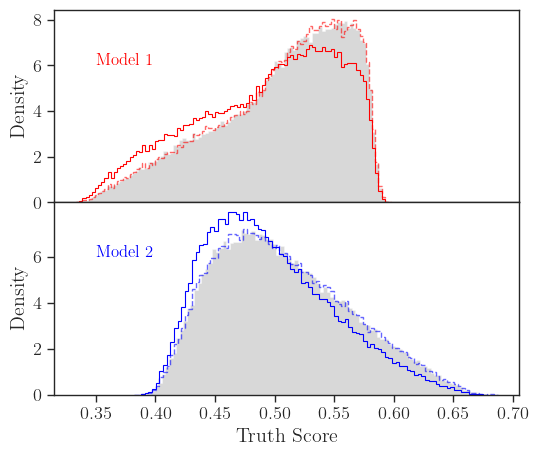

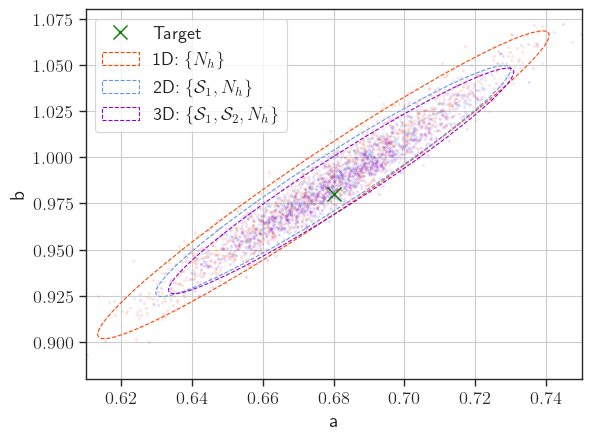

In [70]:
bootstrap_mult_Adam_best = np.load("./paper_data/bootstrap_mult_Adam_best.npy")[:1000]
bootstrap_2D_Adam_best = np.load("./paper_data/bootstrap_2D_Adam_best.npy")[:1000]
bootstrap_3D_Adam_best = np.load("./paper_data/bootstrap_3D_Adam_best.npy")[:1000]

plt.rcParams['text.usetex'] = True

# Scatter plot of the tuned (a, b) pairs
s=2
fig, ax = plt.subplots()
colors = ['orangered', 'cornflowerblue', 'darkviolet']
ax.scatter(bootstrap_mult_Adam_best[:, 0], bootstrap_mult_Adam_best[:, 1], s=s, alpha=0.1, color=colors[0])
ax.scatter(bootstrap_2D_Adam_best[:, 0], bootstrap_2D_Adam_best[:, 1], s=s, alpha=0.1, color=colors[1])
ax.scatter(bootstrap_3D_Adam_best[:, 0], bootstrap_3D_Adam_best[:, 1], s=s, alpha=0.1, color=colors[2])

a_b_target = np.array([0.68, 0.98]) # Monash
ax.plot(a_b_target[0], a_b_target[1], 'x', color='green', ms = 10, linewidth=30, label="Target")
# Plot the confidence ellipse (95% confidence interval)
conf = 0.95
conf_fac = np.sqrt(scipy.stats.chi2.ppf(conf, df=2))
from wasserstein_loss import plot_confidence_ellipse
plot_confidence_ellipse(bootstrap_mult_Adam_best, ax, n_std=conf_fac, edgecolor=colors[0], linestyle='--',
                       label=r'1D: $\{N_h\}$')
plot_confidence_ellipse(bootstrap_2D_Adam_best, ax, n_std=conf_fac, edgecolor=colors[1], linestyle='--',
                       label=r'2D: $\{\mathcal{S}_1, N_h\}$')
plot_confidence_ellipse(bootstrap_3D_Adam_best, ax, n_std=conf_fac, edgecolor=colors[2], linestyle='--',
                       label=r'3D: $\{\mathcal{S}_1, \mathcal{S}_2, N_h\}$')
plt.xlim((0.61,0.75))
plt.ylim((0.88,1.08))

# Label and show the plot
ax.set_xlabel('a')
ax.set_ylabel('b')
#ax.set_title('Bootstrapping Results (Best)')
plt.legend()
plt.grid(True)
plt.savefig("./figs/bootstrap.pdf", bbox_inches='tight')
plt.show()

### Loss Plots

In [79]:
def loss_plot(a_b, loss_grid, gradients, n_points, scale=100, label=''):
    # Calculate the magnitude of each vector in a_b_gradients
    magnitudes = np.linalg.norm(gradients, axis=1)

    fig, ax = plt.subplots(1,1,figsize=(7,6))
    # Set the background color based on the magnitude
    # Normalize the magnitude to use it with the colormap
    norm = mcolors.Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
    cmap = plt.cm.plasma  # Choose a colormap

    # Assuming magnitudes can be reshaped into a grid directly for simplicity
    grid_shape = (int(np.sqrt(len(magnitudes))), int(np.sqrt(len(magnitudes))))
    magnitudes_grid = magnitudes.reshape(grid_shape).T

    # Create a heatmap of the gradient magnitudes
    log_loss = np.log10(loss_grid)
    heatmap = ax.imshow(log_loss.reshape(grid_shape).T, cmap=cmap, origin='lower', 
                        extent=(np.min(a_b[:, 0]), np.max(a_b[:, 0]), np.min(a_b[:, 1]), np.max(a_b[:, 1])),
                        interpolation='lanczos')

    # Add a colorbar to show the magnitude scale
    fig.colorbar(heatmap, ax=ax, label=label, shrink=0.92)

    # Subsample the grid for evenly spaced arrows (10x10)
    subsample_size = min(n_points, 10)
    a_linspace = np.linspace(0, grid_shape[0] - 1, subsample_size, dtype=int)
    b_linspace = np.linspace(0, grid_shape[1] - 1, subsample_size, dtype=int)

    for i in a_linspace:
        for j in b_linspace:
            idx = i * grid_shape[1] + j  # Calculate 1D index
            point = a_b[idx]
            gradient = gradients[idx]
            ax.arrow(point[0], point[1], gradient[0] / scale, gradient[1] / scale,
                     head_width=0.003, head_length=0.003, fc='k', ec='k')

    a_b_target = np.array([0.68, 0.98]) # Monash
    ax.plot(a_b_target[0], a_b_target[1], 'x', color='green', label = 'Target', ms = 6, linewidth=10)
    base = np.array([0.72, 0.88])
    ax.plot(base[0], base[1], 'o', color = 'red', label = 'Base', ms = 5, linewidth=10)
    
    ax.set_title(rf'$N_{{\mathrm{{batch}}}} = 2\times 10^5$')
    ax.set_xlabel(r'$a$')
    #ax.set_xticks = [0.5, 0.6, 0.7, 0.8, 0.9]
    plt.xticks([0.5, 0.6, 0.7, 0.8, 0.9])
    ax.set_ylabel(r'$b$')

    plt.tight_layout()


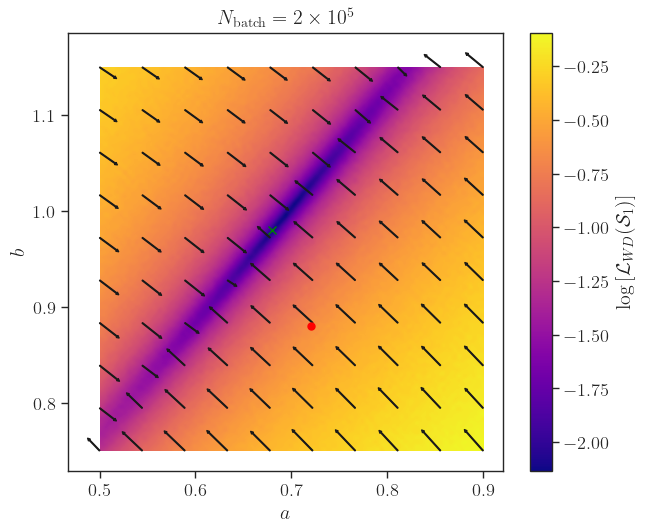

In [80]:
# classifier alone
n_points=100
label=r'$\log \left[ \mathcal{L}_{WD}(\mathcal{S}_1) \right]$'
a_b = np.load(f"./paper_data/ab_grid_0.72_0.88_{n_points}.npy")
loss_grid_class = np.load(f"./paper_data/loss_grid_class_0.72_0.88_{n_points}.npy")
gradients_class = np.load(f"./paper_data/gradients_class_0.72_0.88_{n_points}.npy")

loss_plot(a_b, loss_grid_class, gradients_class,n_points, scale=100, label=label)
plt.savefig("./figs/loss_grid_class_0.72_0.88_20.pdf")
plt.show()

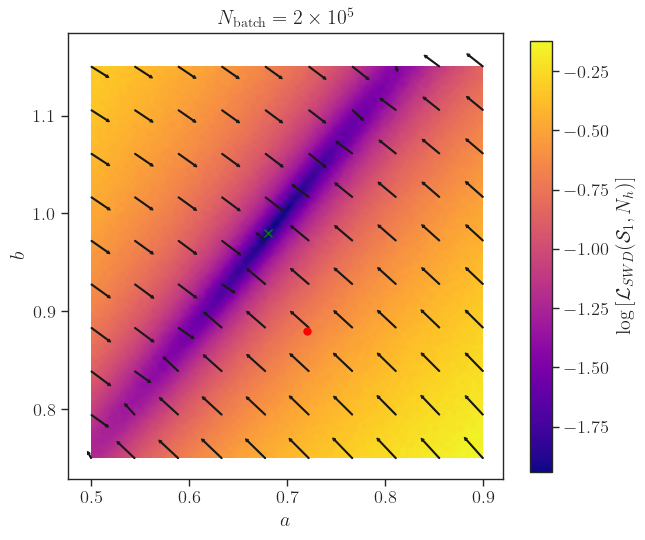

In [81]:
# two classifier + mult
n_points=100
label=r'$\log \left[ \mathcal{L}_{SWD}(\mathcal{S}_1, N_h) \right]$'
a_b = np.load(f"./paper_data/ab_grid_0.72_0.88_{n_points}.npy")
loss_grid_class = np.load(f"./paper_data/loss_grid_2D_0.72_0.88_{n_points}.npy")
gradients_class = np.load(f"./paper_data/gradients_2D_0.72_0.88_{n_points}.npy")

loss_plot(a_b, loss_grid_class, gradients_class, n_points, scale=100, label=label)
plt.savefig(f"./figs/loss_grid_2D_0.72_0.88_{n_points}.pdf")
plt.show()

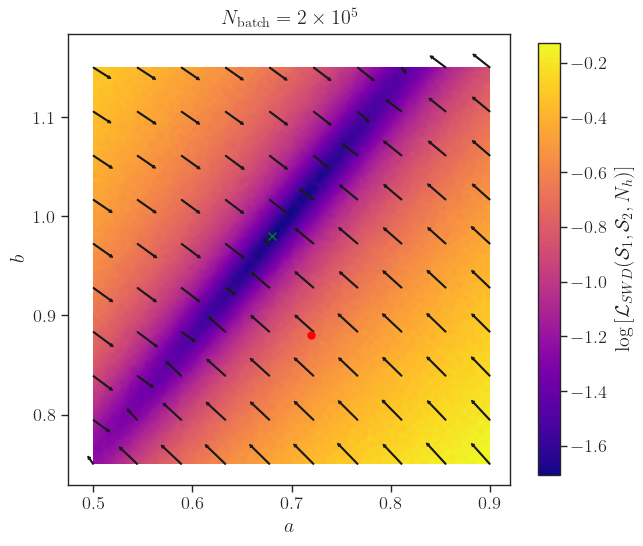

In [82]:
# two classifier + mult
n_points=100
label=r'$\log \left[ \mathcal{L}_{SWD}(\mathcal{S}_1, \mathcal{S}_2, N_h) \right]$'
loss_grid_class = np.load(f"./paper_data/loss_grid_3D_0.72_0.88_{n_points}.npy")
gradients_class = np.load(f"./paper_data/gradients_3D_0.72_0.88_{n_points}.npy")

loss_plot(a_b, loss_grid_class, gradients_class, n_points, scale=100, label=label)
plt.savefig("./figs/loss_grid_3D_0.72_0.88_20.pdf")
plt.show()